In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

## These are few variables related to the layout of the figures
myleft  = 0.125  # the left side of the subplots of the figure
myright = 0.9    # the right side of the subplots of the figure
mybottom = 0.1   # the bottom of the subplots of the figure
mytop = 0.9      # the top of the subplots of the figure
mywspace = 0.2   # the amount of width reserved for space between subplots,
                 # expressed as a fraction of the average axis width
myhspace = 0.5   # the amount of height reserved for space between subplots,
                 # expressed as a fraction of the average axis height

In [2]:
my_data = dict()
for i_track in range(0,10):
    fn = "./collection/track_" + str(i_track) + "_chroma.csv"
    print(fn)
    my_data[i_track] = genfromtxt(fn, delimiter=',')

./collection/track_0_chroma.csv
./collection/track_1_chroma.csv
./collection/track_2_chroma.csv
./collection/track_3_chroma.csv
./collection/track_4_chroma.csv
./collection/track_5_chroma.csv
./collection/track_6_chroma.csv
./collection/track_7_chroma.csv
./collection/track_8_chroma.csv
./collection/track_9_chroma.csv


Text(0.5, 0, 'Frame number (time)')

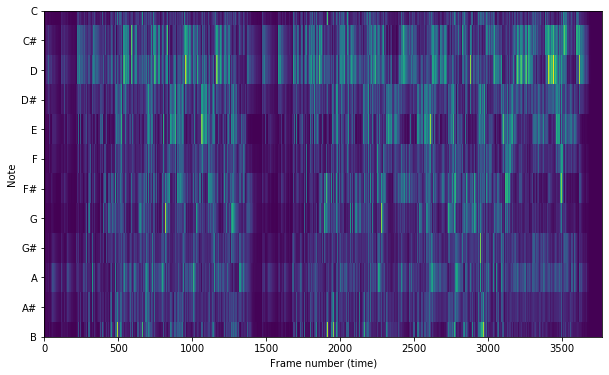

In [5]:
track_index = 7 # Let's look at track 0
track_chroma = my_data[track_index] # Extract the chroma features

fig, axes = plt.subplots(1, 1, sharey='row', figsize=(10, 6))
axes.imshow(track_chroma.T, aspect='auto')
axes.set_yticks((range(0,12)))
axes.yaxis.set_ticklabels(('C','C#','D','D#','E','F','F#','G','G#','A','A#','B'))  # let's not show the y axis
axes.set_ylabel("Note")
axes.set_xlabel("Frame number (time)")

''

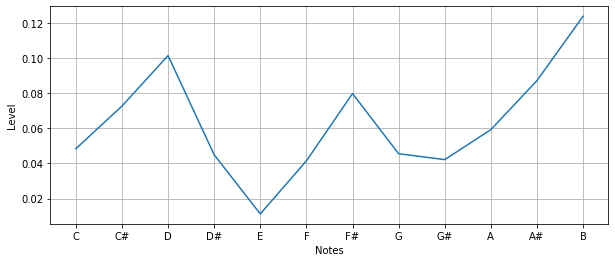

In [6]:
t_index = 456 # let's look at the chroma features at time point 456
notes = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

fig, ax = plt.subplots(sharey='row',figsize=(10, 4))
ax.plot(track_chroma[t_index,:])
ax.set(xticks=range(0,12), xticklabels=notes, xlabel="Notes", ylabel="Level")
ax.grid()
;

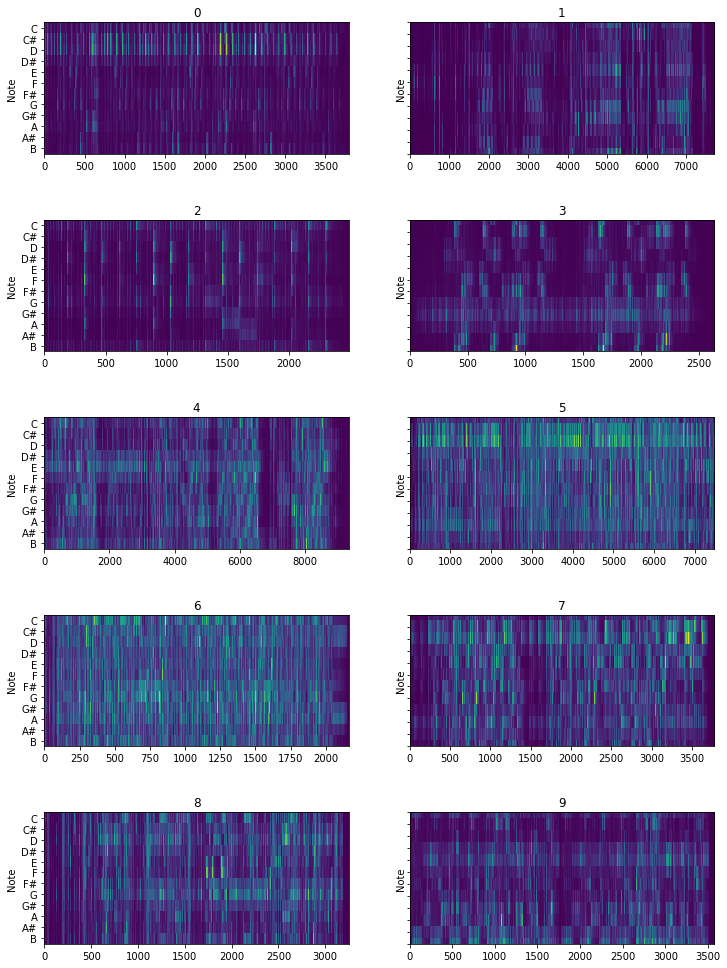

In [7]:
fig, axes = plt.subplots(5, 2, sharey='row',figsize=(12, 16))
for i in range(0,5): 
    for j in range(0,2):         
        track_index = i*2 + j
        track_chroma = my_data[track_index]        
        axes[i, j].imshow(track_chroma.T, aspect='auto')
        axes[i, j].set(yticks=range(0, 12), yticklabels=notes, ylabel="Note", title=track_index)

plt.subplots_adjust(myleft, mybottom, myright, mytop, mywspace, myhspace)

In [10]:
track_index = 7
mean_track_chroma = np.mean(my_data[track_index],axis=0)

In [11]:
print("Size of feature vector: {}".format(np.size(mean_track_chroma)))

Size of feature vector: 12


''

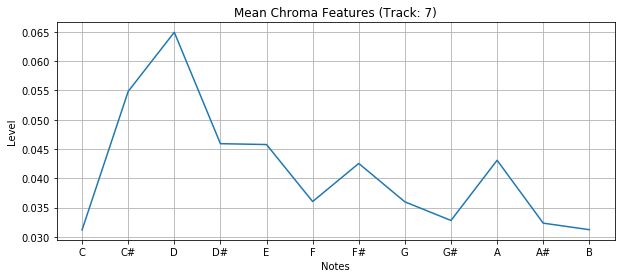

In [12]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(mean_track_chroma)
ax.set_title("Mean Chroma Features (Track: " + str(track_index) +")")
ax.set(xticks=range(0,12), xticklabels=notes, xlabel="Notes", ylabel="Level")
ax.grid()
;

In [13]:
mean_track_chroma = np.zeros((12, 10))
for i in range(0,5): 
    for j in range(0,2):         
        track_index = i*2+j
        mean_track_chroma[:, track_index] = np.mean(my_data[track_index], axis=0) # save in a 12 x 10 table       

## Technicality: Normalise the values for numerical robustness
mm = np.max(np.abs(mean_track_chroma),axis=-1)
mean_track_chroma= mean_track_chroma / mm[:,np.newaxis]

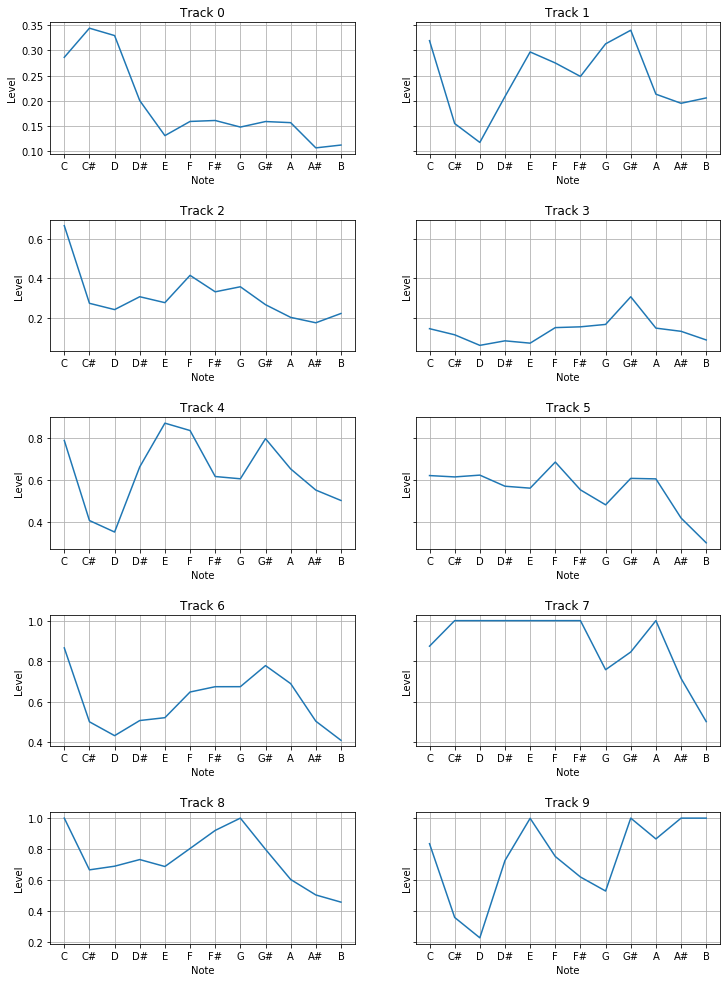

In [14]:
fig, axes = plt.subplots(5, 2,sharey='row',figsize=(12, 16))
for i in range(0,5): 
    for j in range(0,2):         
        track_index = i*2+j
        axes[i, j].plot(mean_track_chroma[:,track_index])
        axes[i, j].set(xticks=range(0, 12), xticklabels=notes, xlabel="Note", ylabel="Level",
                       title="Track " + str(track_index))
        axes[i, j].grid(True)

plt.subplots_adjust(myleft, mybottom, myright, mytop, mywspace, myhspace)

In [15]:
mean_track_chroma_2d = mean_track_chroma[(0, 9),:]

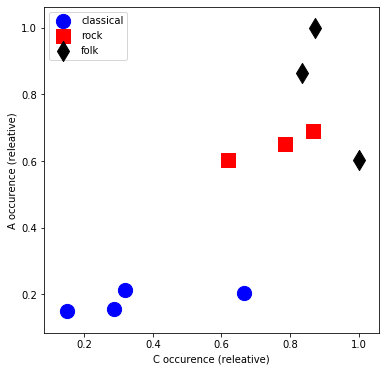

In [18]:
plt.figure(figsize=(6,6))

# Plot classical
plt.scatter(mean_track_chroma_2d[0,0:4], mean_track_chroma_2d[1,0:4], c='blue', alpha=1, marker='o',s=202,label='classical')

# Plot rock
plt.scatter(mean_track_chroma_2d[0,4:7], mean_track_chroma_2d[1,4:7], c='red', alpha=1, marker='s',s=202,label='rock')

# Plot folk
plt.scatter(mean_track_chroma_2d[0,7:10], mean_track_chroma_2d[1,7:10], c='black', alpha=1, marker='d',s=202,label='folk')

plt.xlabel("C occurence (releative)")
plt.ylabel("A occurence (releative)")
plt.legend()

In [19]:
def euclidean_distance(x1, x2): 
    suma = 0
    for i in range(len(x1)):
        suma += np.power(x1[i] - x2[i], 2)
    return np.sqrt(suma)

In [20]:
dist = np.empty((10,10))
for i in range(0,10):
    for j in range(0,10):
        dist[i,j] = euclidean_distance(mean_track_chroma_2d[:,i], mean_track_chroma_2d[:,j])    

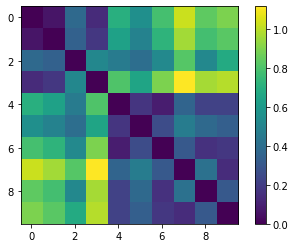

In [21]:
im = plt.imshow(dist, interpolation='none')
plt.colorbar(im)

In [23]:
dist_12D = np.empty((10,10))
for i in range(0,10):
    for j in range(0,10):
        dist_12D[i,j] = euclidean_distance(mean_track_chroma[:,i], mean_track_chroma[:,j])

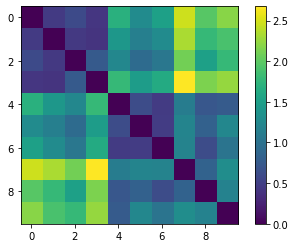

In [24]:
im = plt.imshow(dist_12D, interpolation='none')
plt.colorbar(im)